### hard clustering vs. soft clustering

K-means 알고리즘의 중요한 특징 중 하나는 하드 클러스터링(hard clustering) 방법이라는 점입니다. 즉, 각 포인트를 하나의 클러스터에만 연결합니다. 이 접근 방식의 한계는 데이터 포인트가 특정 클러스터와 얼마나 관련되어 있는지 알려주는 불확실성 측정 또는 확률이 없다는 것입니다. 그렇다면 하드 클러스터링 대신 소프트 클러스터링(soft clustering)을 사용하는 것은 어떨까요? 이것이 바로 가우시안 혼합 모델(Gaussian Mixture Model: GMM)이 시도하는 것입니다. 

## 가우시안 혼합모델 (Gaussian Mixture Model : GMM)

가우시안 혼합은 여러 가우시안들이 혼합되어 만들어진 함수를 말하며, 각각의 가우시안들은 
$  k \in \{1, \cdots, K\}$ 로 구분되며, 여기에서 $K$ 는 주어진 자료에서의 클러스터 개수를 말한다. 
혼합의 각 가우시안 $k$ 는 다음의 파라미터로 구성됩니다.
* $μ$ : 중심을 정의하는 평균.
* $Σ$ : 폭을 정의하는 공분산. 이것은 다변량 가우시안에서 타원체의 치수와 같습니다.
* $π$: 가우시안 함수의 크기를 결정하는 혼합 확률.

이러한 파라메타들을 그래픽으로 설명하면 다음과 같다.

<img src="https://miro.medium.com/max/770/1*lTv7e4Cdlp738X_WFZyZHA.png" width="300">

여기에서, 우리는 세 개의, 즉 $K=3$, 가우시안 함수가 있음을 알 수 있습니다. 
각 가우시안은 주어진 세 개의 클러스터 각각에 포함된 자료들을 설명합니다. 
혼합 계수들(mixing coefficients)은 그들의 확률이며, 다음의 조건을 충족해야 한다. 

$$ \sum_{k=1}^K \pi_k = 1$$

이제 이러한 파라메타에 대한 최적의 값을 어떻게 결정합니까? 이를 위해서는 각 가우시안이 각 클러스터에 속하는 데이터 포인트에 맞는지 확인해야 합니다. 이것이 바로 최대 우도(Maximum Likelihood)가 하는 것 입니다.

일반적으로 가우시안 밀도함수는 다음과 같이 주어집니다.

$$\mathcal{N}(\mathbf{x}\mid \mu, \Sigma) = { 1 \over (2\pi)^{D/2} |\Sigma|^{1/2} } \exp \left( - {1 \over 2} (\mathbf{x}-\mu)^T\Sigma^{-1}(\mathbf{x}-\mu) \right) $$

여기서 
* $x$는 우리의 데이타 세트를 나타내고,  
* $D$는 데이터 포인트들의 차원의 수이다.  
* $μ$와 $Σ$는 각각 평균과 공분산입니다.

$N = 1000$인 3차원 점들로(D = 3) 구성된 데이터 집합이 있는 경우, $x$는 $1000×3$ 행렬이 됩니다. $μ$는 $1\times 3$ 벡터가 되고, $Σ$는 $3\times 3$ 행렬이 됩니다. 나중에 최대로그우도를 찾기 위해 이 방정식의 로그를 얻는 것이 유용하다.

$$ \ln \mathcal{N}(\mathbf{x}\mid \mu, \Sigma) = -{D\over2}\ln 2 \pi -{1\over2}\ln \Sigma -{1\over2}(\mathbf{x}-\mu)^T\Sigma^{-1}(\mathbf{x}-\mu) $$

위의 식의 평균과 공분산에 대한 미분식을 유도한 후에, 이것이 0과 같을 때에 해당하는 파라메타 대한 최적의 값을 찾을 수 있으며,  솔루션은 최우추정치(MLE)에 해당합니다. 그러나 우리는 단지 하나의 가우시안만을 다루는 것이 아니기 때문에 전체 혼합물에 대한 매개 변수를 찾는 데는 시간이 걸리며, 상황이 약간 복잡해질 것입니다. 

### 유도과정

이제 몇 가지 기호를 추가로 소개하겠습니다. 먼저, 데이터 포인트 $x_n$이  Gaussian $k$ 에서 나올 확률이 무엇인지 알고 싶다고 가정합시다. 이를 다음과 같이 표현할 수 있습니다.

$$ p(z_{nk}=1 | x_n)$$

이를 "주어진 데이터 포인트 $x_n$이 가우시안 $k$로부터 나올 확률"이라고 읽습니다. 이 경우 $z$ 는 가능한 두 값만 취하는 잠재변수(latent variable) 입니다. $x_n$이 Gaussian $k$ 에서 왔을 때는 1 이고, 그렇지 않으면 0 입니다. 실제로, 우리는 이 $z$ 변수를 볼 수는 없지만, 그것이 나타날 확률을 아는 것은 나중에 논의할 가우시안 혼합 파라메타를 결정하는 데 도움이 됩니다.

마찬가지로 우리는 다음과 같이 말할 수 있습니다.

$$ \pi_k = p(z_k = 1) $$

이는 가우시안 $k$ 에서 나오는 한 점을 관측 할 전체 확률이 실제로 해당 가우시안의 혼합 계수와 같다는 것을 의미합니다. 가우시안이 클수록 이 확률이 더 높을 것이기 때문에 이것은 의미가 있습니다. 이제 $\mathbf{z}$ 는 다음과 같이 가능한 모든 잠재 변수 $z$들의 집합이라고 합니다.

$$ \mathbf{z} = \{z_1, \cdots, z_K \}$$

우리는 각각의 $z$ 가 다른 $z$ 와 독립적으로 발생하고, $k$ 가 그 점을 발생시킨 클러스터와 같을 때만 1의 값을 취할 수 있음을 알고 있습니다 . 따라서:

$$ p(\mathbf{z})= p(z_1=1)^{z_1}  p(z_2=1)^{z_2}  \cdots p(z_K=1)^{z_K} = \prod_{k=1}^K \pi_k^{z_k}$$

이제 가우시안 $k$ 로부터 온 데이터를 관찰 할 확률을 찾는 것은 어떻습니까? 그것이 실제로 가우시안 함수 자신이 됩니다! $p(\mathbf{z})$ 를 정의 할 때 사용한 것과 동일한 논리에 따라 다음과 같이 말할 수 있습니다.

$$ p(\mathbf{x_n} | \mathbf{z}) = \prod_{k=1}^K \mathcal{N}(\mathbf{x_n}\mid \mu_k, \Sigma_k)^{z_k} $$

왜 우리가 이 모든 일을 하는가? 우리의 처음 목표는 우리의 관찰 $x$ 가 주어진 경우, $z$의 확률을 결정하는 것임을 기억하시오. 우리가 방금 도출한 방정식과 베이즈 규칙이 이 확률을 결정하는 데 도움이 될 것입니다. 확률의 곱셈 규칙에서 우리는

$$p(\mathbf{x_n}, \mathbf{z}) =  p(\mathbf{x_n} | \mathbf{z}) p( \mathbf{z}) $$ 

오른쪽의 피연산자는 우리가 방금 찾은 것입니다. 아마도 여러분 중 일부는 우리가 결국 필요한 확률을 얻기 위해 베이즈 규칙을 사용할 것이라고 기대할 수 있습니다. 그러나, 우리는 $p(x_n,z)$ 가 아닌, 먼저 $p(x_n)$ 필요합니다. 여기서 z 를 어떻게 제거 합니까? 그렇습니다. 경계화(marginalization)! 우리는 단지 z에 대한 항들을 합할 필요가 있으며, 따라서,

$$ p(x_n) = \sum_{k=1}^K  p(x_n | \mathbf{z}) p( \mathbf{z}) = 
\sum_{k=1}^K \pi_k  \mathcal{N}(x_n \mid \mu_k, \Sigma_k)$$

이것이 가우시안 혼합을 정의하는 방정식이며, 앞에서 언급한 모든 파라메타에 따라 달라짐을 분명히 알 수 있습니다. 이들에 대한 최적의 값을 결정하려면, 모형의 최대우도(maximum liklihood)를 결정해야 합니다. 모든 관측치 $x_n$의 결합확률에 대한 우도는 다음과 같이 정의 할 수 있습니다.

$$ p(\mathbf{x}) = \prod_{n=1}^N p(x_n) = \prod_{n=1}^N \sum_{k=1}^K \pi_k  \mathcal{N}(x_n \mid \mu_k, \Sigma_k) $$

원래 가우시안 밀도함수에 대해 한 것처럼 로그를 방정식의 각 측면에 적용해 보겠습니다.

$$ \ln p(\mathbf{x_n}) = \sum_{n=1}^N \ln \sum_{k=1}^K\pi_k  \mathcal{N}(\mathbf{x_n}\mid \mu_k, \Sigma_k)$$

이제 가우시안 혼합에 대한 최적의 매개 변수를 찾으려면 파라메타들에 대하여 이 방정식을 유도하기만 하면 됩니다. 하지만, 여기에 문제가 있습니다. 두 번째 합계에 영향을 미치는 로그가 있음을 알 수 있습니다. 이 표현의 미분을 계산한 다음, 매개 변수를 해결하는 것은 매우 어려울 것입니다!
우리는 무엇을 할 수 있습니까? 매개 변수를 추정하려면 반복적인 방법을 사용해야합니다. 그러나 먼저, 우리는 $z$ 에 $x$가 주어질 확률을 찾아야한다는 것을 기억하십시오 . 자, 이 시점에서 우리는 이 확률이 어떻게 보일지를 정의하기 위해 모든 것을 갖추고 있습니다.

베이즈 규칙에서 우리는 다음을 알고 있습니다.

$$ p(z_k = 1| \mathbf{x_n}) = {  p(\mathbf{x_n}\mid z_k =1) p(z_k =1) \over \sum_{j=1}^K p(\mathbf{x_n}\mid z_j=1) p(z_j =1) }$$

이전의 유도에서는 다음을 알았습니다.

$$ p(z_k = 1) = \pi_k, \quad \quad  p( x_n|z_k = 1) = \mathcal{N}(x_n \mid \mu_k, \Sigma_k)$$

이제 이전 방정식에 이를 치환해 보겠습니다.

$$ p(z_k = 1| x_n) = {  \pi_k  \mathcal{N}(x_n\mid \mu_k, \Sigma_k) \over \sum_{j=1}^K\pi_k  \mathcal{N}(x_n\mid \mu_j, \Sigma_j)} = \gamma(z_{nk})$$

그리고 이것이 우리가 찾고 있던 것입니다! 앞으로 우리는이 표현을 많이 보게 될 것입니다. 다음으로 가우시안 혼합물의 매개 변수를 쉽게 결정하는 데 도움이 되는 방법으로 계속 논의하겠습니다.

### Expectation Maximization (EM) 알고리즘

표본 데이터 집합 $X=\{x_1,x_2, \cdots, x_N\}$ 가 주어질 경우에 데이터의 로그-우도를 최대로 하는 각 혼합 성분 가우시안들의 평균($\mu_c$)과 분산($\sigma_c^2$) 그리고 각 가우시안의 가중치($\pi_c=P(\omega_c)$)와 같은 파라미터들을 추정하여 구하는 문제이다.

학습 데이터 집합은 다음과 같은 개별 가우시안 확률밀도함수를 이루는 파라미터에 따르므로

$$p(x \mid z) = \mathcal{N}(x\mid \mu_k, \Sigma_k)$$

$$ p(x_n | \omega_c, \theta) =  p(x_n | \mu_c, \sigma_c^2) = { 1 \over \sqrt{2 \pi} \sigma_c } \exp \left( - { (x_n -\mu_c)^2 \over 2 \sigma_c^2 }\right)$$

혼합모델식은 다음과 같이 표현된다.

$$ p(x_n | \theta) = \sum_{c=1}^C p(x_n | \omega_c, \theta) p(\omega_c | \theta) = \sum_{c=1}^M p(x_n| \mu_c, \sigma_c^2) \pi_c $$

이로부터 혼합성분의 로그우도를 최대화시키는 파라미터를 다음처럼 최우추정(MLE)법으로
구하게 된다.

$$ \begin{array}{}
\hat{\theta} & = \arg \max [p(X| \mathbf{\theta}) ]\\
             & = \arg \max [\sum_{n=1}^N \log p(x_n| \mathbf{\theta}) ]\\
             & = \arg \max [\sum_{n=1}^N \log \sum_{j=1}^M p(x_n|\theta_j)p(\omega_j) ]\\
   \end{array}
   $$

최대로그-우도(MLE:Maximum log-likelihood)를 구하기 위해서 평균($\mu_j$)에 대한 편미분을  0으로 놓고 정리하여, 최적의 평균($\mu_j$) 추정치를 유도한다.

$$
\begin{array}{}
{\partial \over \partial \mu_j} 
& = {\partial \over \partial \mu_j} \sum_{n=1}^N \log p(x_n | \theta) \\
& = \sum_{n=1}^N  { 1 \over p(x_n | \theta) } {\partial \over \partial \mu_j} p(x_n | \theta) \\
& = \sum_{n=1}^N  { 1 \over p(x_n | \theta) } {\partial \over \partial \mu_j}\sum_{i=1}^M   p(x_n | \mu_i, \sigma_i^2) p(\omega_i)  \\
& = \sum_{n=1}^N  { 1 \over p(x_n | \theta) } {1 \over \sqrt{2\pi\sigma_j }}\exp \left( -{ (x_n -\mu_j)^2 \over 2 \pi \sigma_j^2 } \right) {2 (x_n -\mu_j)\over 2 \pi \sigma_j^2 }p(\omega_j) \\
& = \sum_{n=1}^N  { 1 \over p(x_n | \theta) } p(x_n | \mu_j, \sigma_j^2) { (x_n -\mu_j)\over \sigma_j^2 }p(\omega_j) \\
& = \sum_{n=1}^N P(\omega_j | x_n, \theta)  { (x_n -\mu_j)\over \sigma_j^2 }  \\
\end{array}
$$

$$ 0 = \sum_{n=1}^N P(\omega_j | x_n, \theta)x_n - \mu_j \sum_{N=1}^N P(\omega_j | x_n, \theta) $$
$$ \mu_j = { \sum_{n=1}^N P(\omega_j | x_n, \theta)x_n  \over \sum_{N=1}^N P(\omega_j | x_n, \theta) } $$


모든 파라메타들의 추정치를 정리하면 다음과 같이 된다.

$$ {\partial \over \partial \mu_c}[\cdot] \quad \Rightarrow \hat{\mu_c} = { \sum_n P(\omega_c | x^{(n}) x^{(n} \over \sum_n P(\omega_c | x^{(n}) } $$

$$ {\partial \over \partial \sigma_c}[\cdot] \quad \Rightarrow \hat{\sigma}_c^2 = { 1 \over d} { \sum_n P(\omega_c | x^{(n}) \| x^{(n}-\hat{\mu_c} \|^2 \over \sum_n P(\omega_c | x^{(n}) } $$

$$ {\partial \over \partial P(\omega_c)}[\cdot] \quad \Rightarrow \hat{P}(\omega_c) = { 1 \over N} \sum_n P(\omega_c | x^{(n}) $$

#### EM (Expectation-Maximization) 알고리즘

위의 식에서 최종모델 파라미터들($\mu_c, \sigma_c, P(\omega_c) $)이 베이즈 룰에 따라서 다시 우변에 포함되어 있으므로

1. 모델 파라미터의 초기값 설정 “old”

2. 파라미터에 대한 “new” 값을 얻기 위해서 방정식의 우변을 계산

3. “old”, “new”, 그리고 반복

#### K-means 알고리즘과의 유사성
1. 상호작용하는 2개의 파라메타 (클래스와 중심)
2. 기대치(expectation)와 최대화(maximization) 적용 알고리즘
  - Expectation : 데이타점들을 클러스터에 할당하는 것
  - Maximization : 중심을 갱신하는 과정

Expectation 스텝: 확률을 할당하기
Maximization 스텝 : 

#### EM(Expectation-Maximization) 알고리즘

**Expectation** - 
혼합모델의 모수추정에서 중요한 역할을 하는 것 중의 하나가 바로 각 데이터가 어떤 카테고리에 속하는가를 알려주는 조건부 확률  $p(z\mid x)$  값이다. 이 값을 responsibility 라고 한다. 즉, n-번째 데이터 $x_n$가 카테고리 $k$에서 만들어졌을 확률 $ \pi_{nk}$ 는 다음과 같이 된다,

$$
\begin{eqnarray}
\pi_{nk} 
&=& p(z_n=k\mid x_n) \\
&=& \dfrac{p(z_i=k)p(x_i\mid z_i=k)}{p(x_i)} \\
&=& \dfrac{p(z_i=k)p(x_i\mid z_i=k)}{\sum_{k=1}^K p(x_i,z_i=k)} \\
&=& \dfrac{p(z_i=k)p(x_i\mid z_i=k)}{\sum_{k=1}^K p(z_i=k)p(x_i\mid z_i=k)} 
\end{eqnarray}
$$

가우시안 혼합모델의 경우 다음과 같이 정리할 수 있다.

$$ \pi_{ik} = \dfrac{\pi_k \mathcal{N}(x_i\mid \mu_k, \Sigma_k)}{\sum_{k=1}^K \pi_k \mathcal{N}(x_i\mid \mu_k, \Sigma_k)}$$

이 식은 모수로부터 responsibility를 추정하게 해준다.
$$ (\pi_k, \mu_k, \Sigma_k) \;\; \implies \;\; \pi_{ik}$$
$\pi_{ik}$ 는  i 번째 데이터  $x_i$ 가 카테고리  k 에서 만들어졌을 확률을 나타낸다.

**Maximization** - 이제 로그-결합확률분포함수를 최대화한다.
우선 $\mu_k$ 로 미분하여 0 이 되도록 하는 방정식을 만들면 다음과 같다.
$$0 = - \sum_{i=1}^N \dfrac{p(z_i=k)p(x_i\mid z_i=k)}{\sum_{k=1}^K p(z_i=k)p(x_i\mid z_i=k)} \Sigma_k (x_i - \mu_k )$$
이를 정리하면,
$$ \sum_{i=1}^N \pi_{ik} (x_i - \mu_k ) = 0$$
$$ \mu_k = \dfrac{1}{N_k} \sum_{i=1}^N \pi_{ik} x_i$$
위 식에서
$$N_k = \sum_{i=1}^N \pi_{ik}$$
이고  $k$  카테고리에 속하는 데이터의 수와 비슷한 의미를 가진다. 즉 $\mu_k$ 는  $k$ 카테고리에 속하는 데이터의 샘플 평균과 같은 의미이다.

마찬가지로 로그-결합확률분포함수를 $\sigma_k$ 로 미분하여 최대화하는 모수값을 구하면 다음과 같다.

$$\Sigma_k = \dfrac{1}{N_k} \sum_{i=1}^N \pi_{ik} (x_i-\mu_k)(x_i-\mu_k)^T $$

마지막으로 로그-결합확률분포함수를 $\pi_k$ 로 미분하여 최대화하는 모수값을 구해야 하는데 이 때 카테고리값의 모수가 가지는 제한 조건으로 인해 Lagrange multiplier 를 추가해야 한다.

$$ \log p(x) + \lambda \left(\sum_{k=1}^K \pi_k - 1 \right) $$
이를 $\pi_k$로 미분하여 0 이 되는 값을 찾으면 다음과 같다.

$$\pi_k = \dfrac{N_k}{N}$$

이 세가지 식은 모두 responsibility로부터 모수를 구하고 있다.
$$\pi_{ik} \;\; \implies \;\; (\pi_k, \mu_k, \Sigma_k )$$

원래는 연립방정식의 해를 구하는 방법으로 responsibility를 포함한 모수값을 추정해야 한다. 그러나 만약 식의 형태가 responsibility를 알고 있다면 모수를 추정하는 것이 간단하도록 만들어져 있기 때문에 EM(Expectation-Maximization)이라고 하는 iterative 방법을 사용하면 연립방정식의 해를 구하는 것보다 더 쉽게 모수를 추정할 수 있다.

EM 방법은 모수와 responsiblity를 번갈아 추정하며 정확도를 높여가는 방법이다.

* Expectation step 에서는 우리가 현재까지 알고 있는 모수가 정확하다고 가정하고 이를 사용하여 각 데이터가 어느 카테고리에 속하는지 즉, responsiblity를 추정한다.
$$ (\pi_k, \mu_k, \Sigma_k) \;\; \implies \;\; \pi_{ik}$$
 
* Maximization step 에서는 우리가 현재까지 알고 있는 responsibility가 정확하다고 가정하고 이를 사용하여 모수값을 추정한다.
$$\pi_{ik} \;\; \implies \;\; (\pi_k, \mu_k, \Sigma_k)$$
 
이를 반복하면 모수와 responsibility를 동시에 점진적으로 개선할 수 있다.

#### 클러스터링
각각의 데이터에 대해 responsibility을 알게되면 responsibility가 가장 큰 카테고리를 찾아내어 그 데이터가 어떤 카테고리에 속하는지를 알 수 있다. 즉 클러스터링을 할 수 있다.

$$k_i = \arg\max_{k} \pi_{ik}$$
 
사실 K-means clustering은 EM 방법의 특수한 경우라고 볼 수 있다.

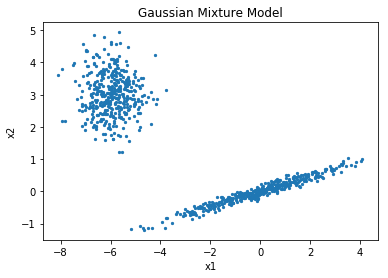

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randn

n_samples = 400

mu1 = np.array([0, 0])
mu2 = np.array([-6, 3])
sigma1 = np.array([[0., -0.1], [1.7, .4]])
sigma2 = np.eye(2)

np.random.seed(0)
X = np.r_[1.0 * np.dot(randn(n_samples, 2), sigma1) + mu1,
          0.7 * np.dot(randn(n_samples, 2), sigma2) + mu2]
plt.scatter(X[:, 0], X[:, 1], s=5)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Gaussian Mixture Model")
plt.show()

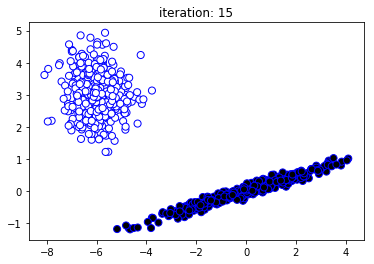

In [11]:
from sklearn.mixture import GaussianMixture
model = GaussianMixture(n_components=2, max_iter=20) #  init_params='random', random_state=0, tol=1e-9,
model.fit(X)
pi = model.predict_proba(X)
plt.scatter(X[:, 0], X[:, 1], s=50, edgecolors="b", cmap=plt.cm.binary, c=pi[:, 0])
plt.title("iteration: 15")
plt.show()

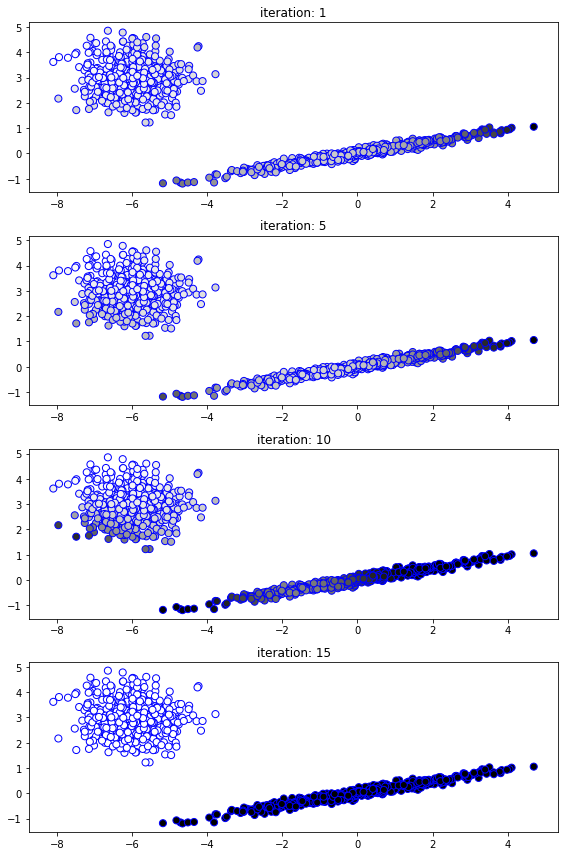

In [17]:
from sklearn.mixture import GaussianMixture
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

def plot_gaussianmixture(n):
    model = GaussianMixture(n_components=2, init_params='random', random_state=0, tol=1e-9, max_iter=n)
    with ignore_warnings(category=ConvergenceWarning):
        model.fit(X)
    pi = model.predict_proba(X)
    plt.scatter(X[:, 0], X[:, 1], s=10, linewidth=1, edgecolors="b", cmap=plt.cm.binary, c=pi[:, 0])
    plt.title("iteration: {}".format(n))
    

plt.figure(figsize=(8, 12))
plt.subplot(411)
plot_gaussianmixture(1)
plt.subplot(412)
plot_gaussianmixture(5)
plt.subplot(413)
plot_gaussianmixture(10)
plt.subplot(414)
plot_gaussianmixture(15)
plt.tight_layout()
plt.show()

**[reference]**  
* https://towardsdatascience.com/gaussian-mixture-models-explained-6986aaf5a95
* https://datascienceschool.net/view-notebook/c2934b8a2f9140e4b8364b266b1aa0d8/